In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="7"
os.environ["DISPLAY"]=":1.6"

/data/zhao/anaconda3/envs/rlb/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.
error: library ( /informatik3/wtm/home/zhao/CoppeliaSim_Edu_V4_4_0_rev0_Ubuntu20_04/libsimExtROS.so ) load: "Cannot load library /informatik3/wtm/home/zhao/CoppeliaSim_Edu_V4_4_0_rev0_Ubuntu20_04/libsimExtROS.so: (libimage_transport.so: cannot open shared object file: No such file or directory)"
error: library ( /informatik3/wtm/home/zhao/CoppeliaSim_Edu_V4_4_0_rev0_Ubuntu20_04/libsimExtROS2.so ) load: "Cannot load library /informatik3/wtm/home/zhao/CoppeliaSim_Edu_V4_4_0_rev0_Ubuntu20_04/libsimExtROS2.so: (libstd_srvs__rosidl_typesupport_cpp.so: cannot open shared object file: No such file or dir

Target: black ceramic (/informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/train/Clip_15.wav).
Distractor0: green plastic (/informatik3/wtm/home/zhao/Codes/material_sounds/plastic/train/Clip_2.wav).
Distractor1: black metal (/informatik3/wtm/home/zhao/Codes/material_sounds/metal/train/Clip_1.wav).
Target: black ceramic (/informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/train/Clip_13.wav).
Distractor0: black metal (/informatik3/wtm/home/zhao/Codes/material_sounds/metal/train/Clip_2.wav).
Distractor1: blue plastic (/informatik3/wtm/home/zhao/Codes/material_sounds/plastic/train/Clip_11.wav).
Target: red ceramic (/informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_5.wav).
Distractor0: red glass (/informatik3/wtm/home/zhao/Codes/material_sounds/glass/test/Clip_3.wav).
Distractor1: yellow ceramic (/informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_2.wav).


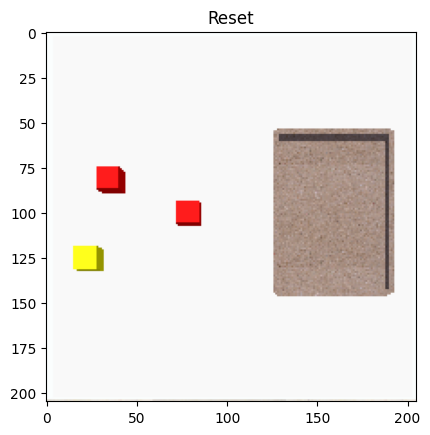

In [2]:
import numpy as np
from vild import ViLDDetector
import matplotlib.pyplot as plt
import imageio
from knock_env import NICOLEnv
from pyrep.objects.shape import Shape
from tqdm import tqdm

training_epoches = 1
episode_length = 2
obs = None

DEFAULT_POSE = np.array([0.83443451, 0.76801813, -0.61692601, -0.13173638, 0.11043578])
def complete_action(action):
    return np.r_[action, DEFAULT_POSE, 1] # 1: knock

env = NICOLEnv(observation_mode='vision', headless=True, render_mode=None)
# env.set_mode('train')
env.set_mode('test')
env.set_random(False)
target = Shape('Target')
try:
    obs = env.reset()
    action = np.array([*target.get_position()][:2]) #, *target.get_quaternion(), 1, 0])
    # distract_action = np.array([*distractor.get_position(), *distractor.get_quaternion(), 0, 1])
except RuntimeError:
    print('Bad initialization, reset.')
except Exception as e:
    raise e

image = obs['front_rgb']
imageio.imwrite('image.jpg', image)
plt.figure()
plt.title('Reset')
plt.imshow(image)

Target: red ceramic (/informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_3.wav).
Distractor0: red glass (/informatik3/wtm/home/zhao/Codes/material_sounds/glass/test/Clip_4.wav).
Distractor1: yellow ceramic (/informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_2.wav).


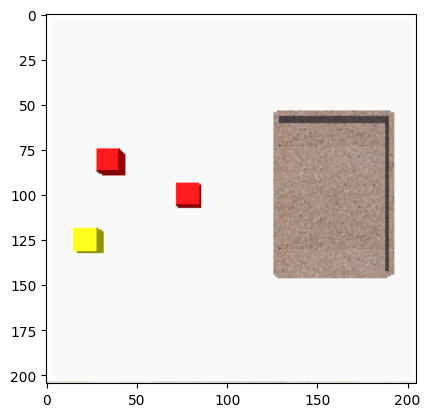

In [3]:
obs = env.reset()
image = obs['front_rgb']
plt.figure()
plt.imshow(image)
plt.show()

In [4]:
vilder=ViLDDetector()

Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from ./image_path_v2/variables/variables


2023-02-17 14:03:14.424710: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-02-17 14:03:14.425580: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-02-17 14:03:14.745358: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2023-02-17 14:03:14.745665: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Alloc

Building text embeddings...


100%|██████████| 15/15 [00:00<00:00, 30.05it/s]


Found a yellow block with score: 0.31946677
Found a red block with score: 0.3057329
Found a red block with score: 0.28684026
{'yellow block': {'box': array([117.53889 ,  13.807173, 132.59515 ,  31.58398 ], dtype=float32), 'coordinates': (125.0670166015625, 22.695575714111328), 'action': (0.6100830078125, 0.1107101254346894)}, 'red block on the left': {'box': array([74.45434 , 27.625505, 89.988945, 43.785732], dtype=float32), 'coordinates': (82.22164154052734, 35.70561981201172), 'action': (0.4010811782464748, 0.17417375518054498)}, 'red block on the right': {'box': array([ 93.52788,  71.56357, 107.83365,  85.7643 ], dtype=float32), 'coordinates': (100.6807632446289, 78.66393280029297), 'action': (0.4911256743640434, 0.38372650146484377)}}


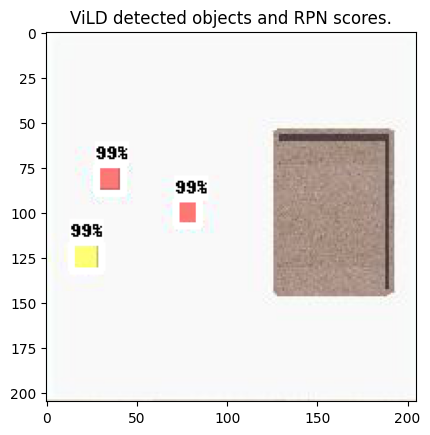

In [5]:
image_path = "image.jpg"
category_names = [
    "blue block",
    "red block",
    # "green block",
    "orange block",
    "yellow block",
    "purple block",
    "pink block",
    # "cyan block",
    # "brown block",
    "blue bowl",
    "red bowl",
    "green bowl",
    "orange bowl",
    "yellow bowl",
    "purple bowl",
    "pink bowl",
    # "cyan bowl",
    "brown bowl",
]

found_objects = vilder.detect(image_path=image_path, category_names=category_names,plot_on=True)
actions = []
for k, v in found_objects.items():
    action = found_objects[k]['action']
    # action = (0.6189520359039307, 0.5789756774902344)
    aa = complete_action(action)
    actions.append(aa)

In [6]:
found_objects

{'yellow block': {'box': array([117.53889 ,  13.807173, 132.59515 ,  31.58398 ], dtype=float32),
  'coordinates': (125.0670166015625, 22.695575714111328),
  'action': (0.6100830078125, 0.1107101254346894)},
 'red block on the left': {'box': array([74.45434 , 27.625505, 89.988945, 43.785732], dtype=float32),
  'coordinates': (82.22164154052734, 35.70561981201172),
  'action': (0.4010811782464748, 0.17417375518054498)},
 'red block on the right': {'box': array([ 93.52788,  71.56357, 107.83365,  85.7643 ], dtype=float32),
  'coordinates': (100.6807632446289, 78.66393280029297),
  'action': (0.4911256743640434, 0.38372650146484377)}}

action pre: [ 0.61008301  0.11071013  0.83443451  0.76801813 -0.61692601 -0.13173638
  0.11043578  1.        ]
=====>>>> playing /informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_2.wav
=====>>>> playing /informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_2.wav
=====>>>> playing /informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_2.wav
=====>>>> playing /informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_2.wav
=====>>>> playing /informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_2.wav
=====>>>> playing /informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_2.wav
=====>>>> playing /informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_2.wav
=====>>>> playing /informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_2.wav
=====>>>> playing /informatik3/wtm/home/zhao/Codes/material_sounds/ceramic/test/Clip_2.wav
=====>>>> playing /informatik3/wtm/home/zhao/Codes/material_sounds/cer

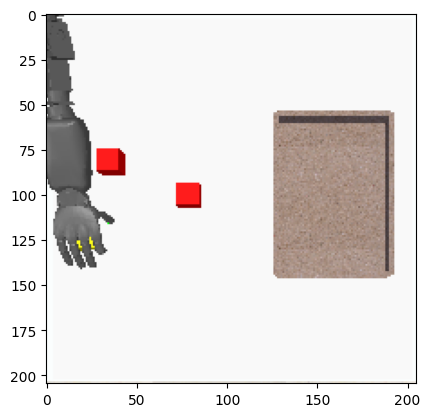

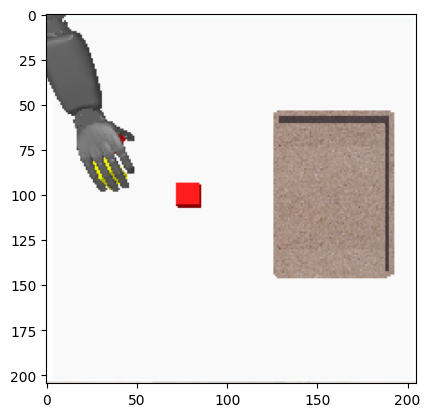

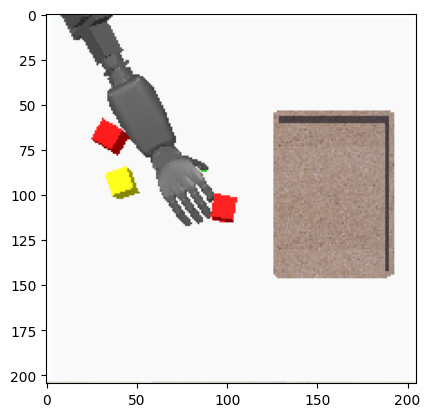

[CoppeliaSim:loadinfo]   done.


In [7]:
for action in actions:
    print(f'action pre: {action}')
    obs, reward, terminate, info = env.step(action)
    print(f'action post: {action}')
    print(reward)
    print(info)
    plt.figure()
    image = obs['front_rgb']
    plt.imshow(image)
print('Done')
plt.show()
env.close()

In [8]:
actions

[array([ 0.39926827, -0.44421827,  0.83443451,  0.76801813, -0.61692601,
        -0.13173638,  0.11043578,  1.        ]),
 array([ 0.22788676, -0.39217809,  0.83443451,  0.76801813, -0.61692601,
        -0.13173638,  0.11043578,  1.        ]),
 array([ 0.30172325, -0.22034483,  0.83443451,  0.76801813, -0.61692601,
        -0.13173638,  0.11043578,  1.        ])]

In [9]:
found_objects

{'yellow block': {'box': array([117.53889 ,  13.807173, 132.59515 ,  31.58398 ], dtype=float32),
  'coordinates': (125.0670166015625, 22.695575714111328),
  'action': (0.6100830078125, 0.1107101254346894)},
 'red block on the left': {'box': array([74.45434 , 27.625505, 89.988945, 43.785732], dtype=float32),
  'coordinates': (82.22164154052734, 35.70561981201172),
  'action': (0.4010811782464748, 0.17417375518054498)},
 'red block on the right': {'box': array([ 93.52788,  71.56357, 107.83365,  85.7643 ], dtype=float32),
  'coordinates': (100.6807632446289, 78.66393280029297),
  'action': (0.4911256743640434, 0.38372650146484377)}}